In [4]:
import sys
import os
if '/mnt/c/Users/attic/HLS Kelp Detection/tools' not in sys.path:
    sys.path.append('/mnt/c/Users/attic/HLS Kelp Detection/tools')
import data_tools as dt
import rasterio
import matplotlib.pyplot as plt
import numpy as np

In [13]:
def view_processed_img(path, crop_coords=None, title=None):
    with rasterio.open(path, 'r') as src:
        bands = src.read()
    
    plt.figure(figsize=(16, 8))
    
    if title is not None:
        plt.title(title)
    
    
    if crop_coords is None:
        plt.subplot(1, 2, 1)
        plt.imshow(bands[0])
        plt.subplot(1, 2, 2)
        #mesma = np.where(bands[1] == 0, np.nan, bands[0])
        plt.imshow(bands[1])
    else:
        start_row, end_row, start_col, end_col = crop_coords
        plt.subplot(1, 2, 1)
        plt.imshow(bands[0, start_row:end_row, start_col:end_col])
        plt.subplot(1, 2, 2)
        mesma = np.where(bands[1] == 0, np.nan, bands[0])
        plt.imshow(mesma[start_row:end_row, start_col:end_col])
    plt.show()

In [3]:
processed_path = r'/mnt/c/Users/attic/HLS Kelp Detection/processed imagery/tiles'
tile = '10UCU'

tile_folder = os.path.join(processed_path,tile)
files = set(os.listdir(tile_folder))
files.discard('kelp_map.tif')
files = list(files)
for file in files:
    print(file)
    view_processed_img(os.path.join(tile_folder,file), title=file)

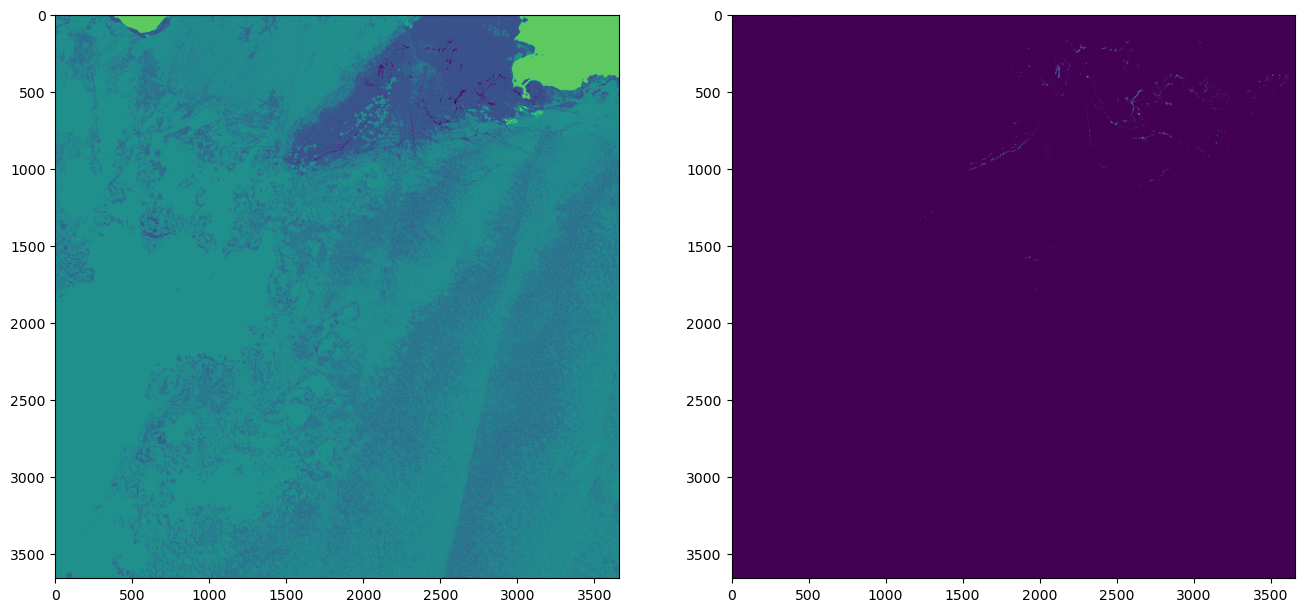

2024-07-15T15:08:09.343928Z
['https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-public/HLSS30.020/HLS.S30.T19QFV.2024197T150729.v2.0/HLS.S30.T19QFV.2024197T150729.v2.0.jpg']


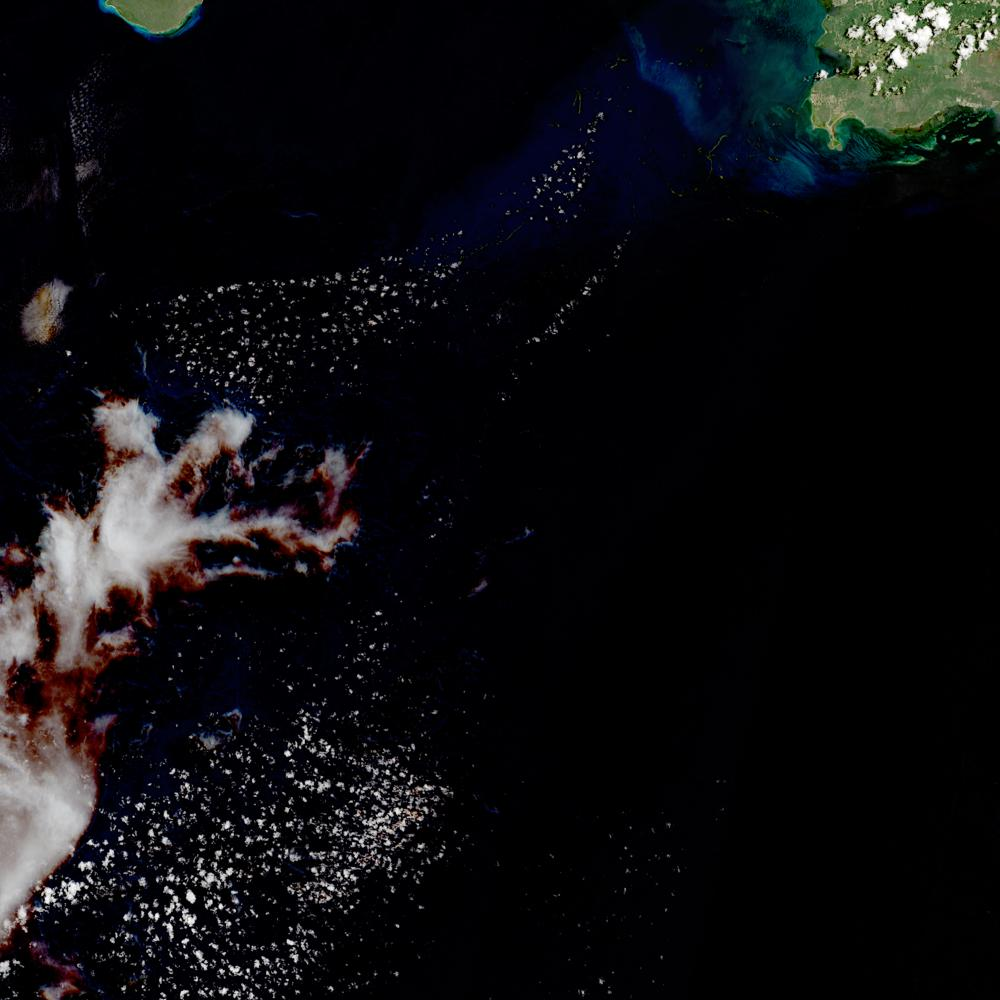

In [14]:
tile = '19QFV'
granule = 'HLS.S30.T19QFV.2024197T150729.v2.0'
bands_path = os.path.join('/mnt/c/Users/attic/HLS Kelp Detection/imagery/tiles',tile,granule)
processed_image_path = os.path.join(r'/mnt/c/Users/attic/HLS Kelp Detection/processed imagery/tiles',tile,f'{granule}.tif')
view_processed_img(processed_image_path)
dt.view_img(bands_path)